Q1.

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [82]:
df = pd.read_csv("diabetes.csv")

In [83]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [84]:
df.shape

(768, 9)

In [85]:
#correlation between diffrent variable
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [86]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Q2.

In [87]:
#Checking missing value
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

no missing value found

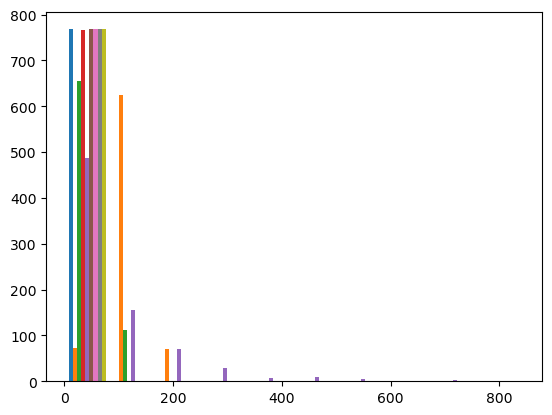

In [88]:
plt.hist(df)
plt.show()

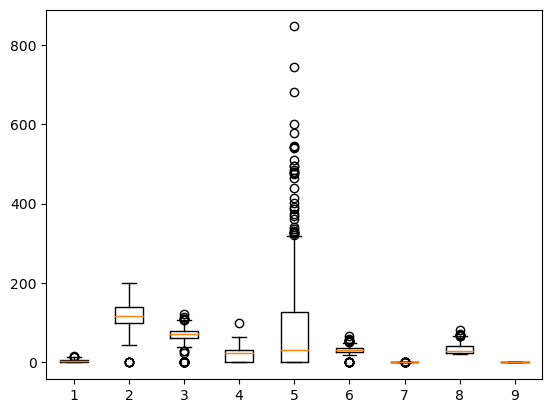

In [89]:
plt.boxplot(df)
plt.show()

Insulin have many outliers

In [90]:
df['Insulin'].value_counts()

0      374
105     11
130      9
140      9
120      8
      ... 
73       1
171      1
255      1
52       1
112      1
Name: Insulin, Length: 186, dtype: int64

In [91]:
df.loc[df['Insulin'] > 450, 'Insulin'] = df['Insulin'].mean()


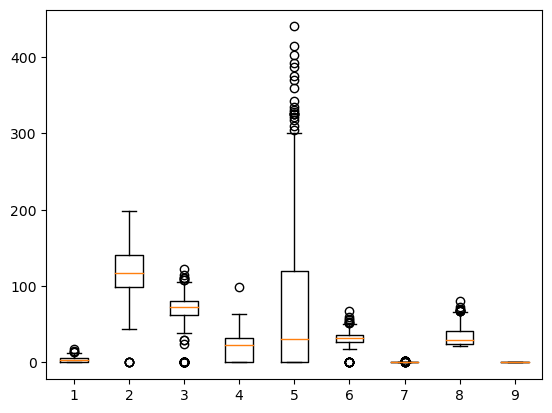

In [92]:
plt.boxplot(df)
plt.show()

In [93]:
df.shape

(768, 9)

some outliers are removes

Q3

Spliting the dataset into a training set and a test set.

In [94]:
X = df.iloc[:,:-1]

In [95]:
y = df.iloc[:,-1]

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)

Q4

Using cross-validation to optimize the hyperparameters

In [98]:
from sklearn.tree import DecisionTreeClassifier
treeclassifier = DecisionTreeClassifier()

In [99]:
parameter =  {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

In [100]:
from sklearn.model_selection import GridSearchCV
clf =  GridSearchCV(treeclassifier,parameter,cv=5)

In [101]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150]})

In [102]:
clf.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [107]:
y_pred = clf.predict(X_test)

In [108]:
y_pred

array([1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1])

{'criterion': 'entropy', 'max_depth': 5} best parameter

Q5

accuracy,precision, recall, and F1 score.

In [104]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [109]:
#accuracy
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7316017316017316


In [110]:
#precision
precision = precision_score(y_test, y_pred)
print(precision)

0.7213114754098361


In [111]:
#recall
recall = recall_score(y_test, y_pred)
print(recall)

0.4943820224719101


In [112]:
#f1
f1 = f1_score(y_test, y_pred)
print(f1)

0.5866666666666667


In [113]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[125  17]
 [ 45  44]]


Q6

In [123]:
clf = DecisionTreeClassifier(criterion= 'entropy', max_depth= 5)

In [125]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

[Text(0.4429347826086957, 0.9166666666666666, 'x[1] <= 127.5\nentropy = 0.918\nsamples = 537\nvalue = [358, 179]'),
 Text(0.20108695652173914, 0.75, 'x[7] <= 28.5\nentropy = 0.699\nsamples = 339\nvalue = [275, 64]'),
 Text(0.10869565217391304, 0.5833333333333334, 'x[5] <= 30.95\nentropy = 0.375\nsamples = 193\nvalue = [179, 14]'),
 Text(0.06521739130434782, 0.4166666666666667, 'x[0] <= 7.5\nentropy = 0.132\nsamples = 109\nvalue = [107, 2]'),
 Text(0.043478260869565216, 0.25, 'x[6] <= 0.672\nentropy = 0.076\nsamples = 108\nvalue = [107, 1]'),
 Text(0.021739130434782608, 0.08333333333333333, 'entropy = 0.0\nsamples = 94\nvalue = [94, 0]'),
 Text(0.06521739130434782, 0.08333333333333333, 'entropy = 0.371\nsamples = 14\nvalue = [13, 1]'),
 Text(0.08695652173913043, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.15217391304347827, 0.4166666666666667, 'x[2] <= 37.0\nentropy = 0.592\nsamples = 84\nvalue = [72, 12]'),
 Text(0.13043478260869565, 0.25, 'entropy = 0.0\nsamples = 2\n

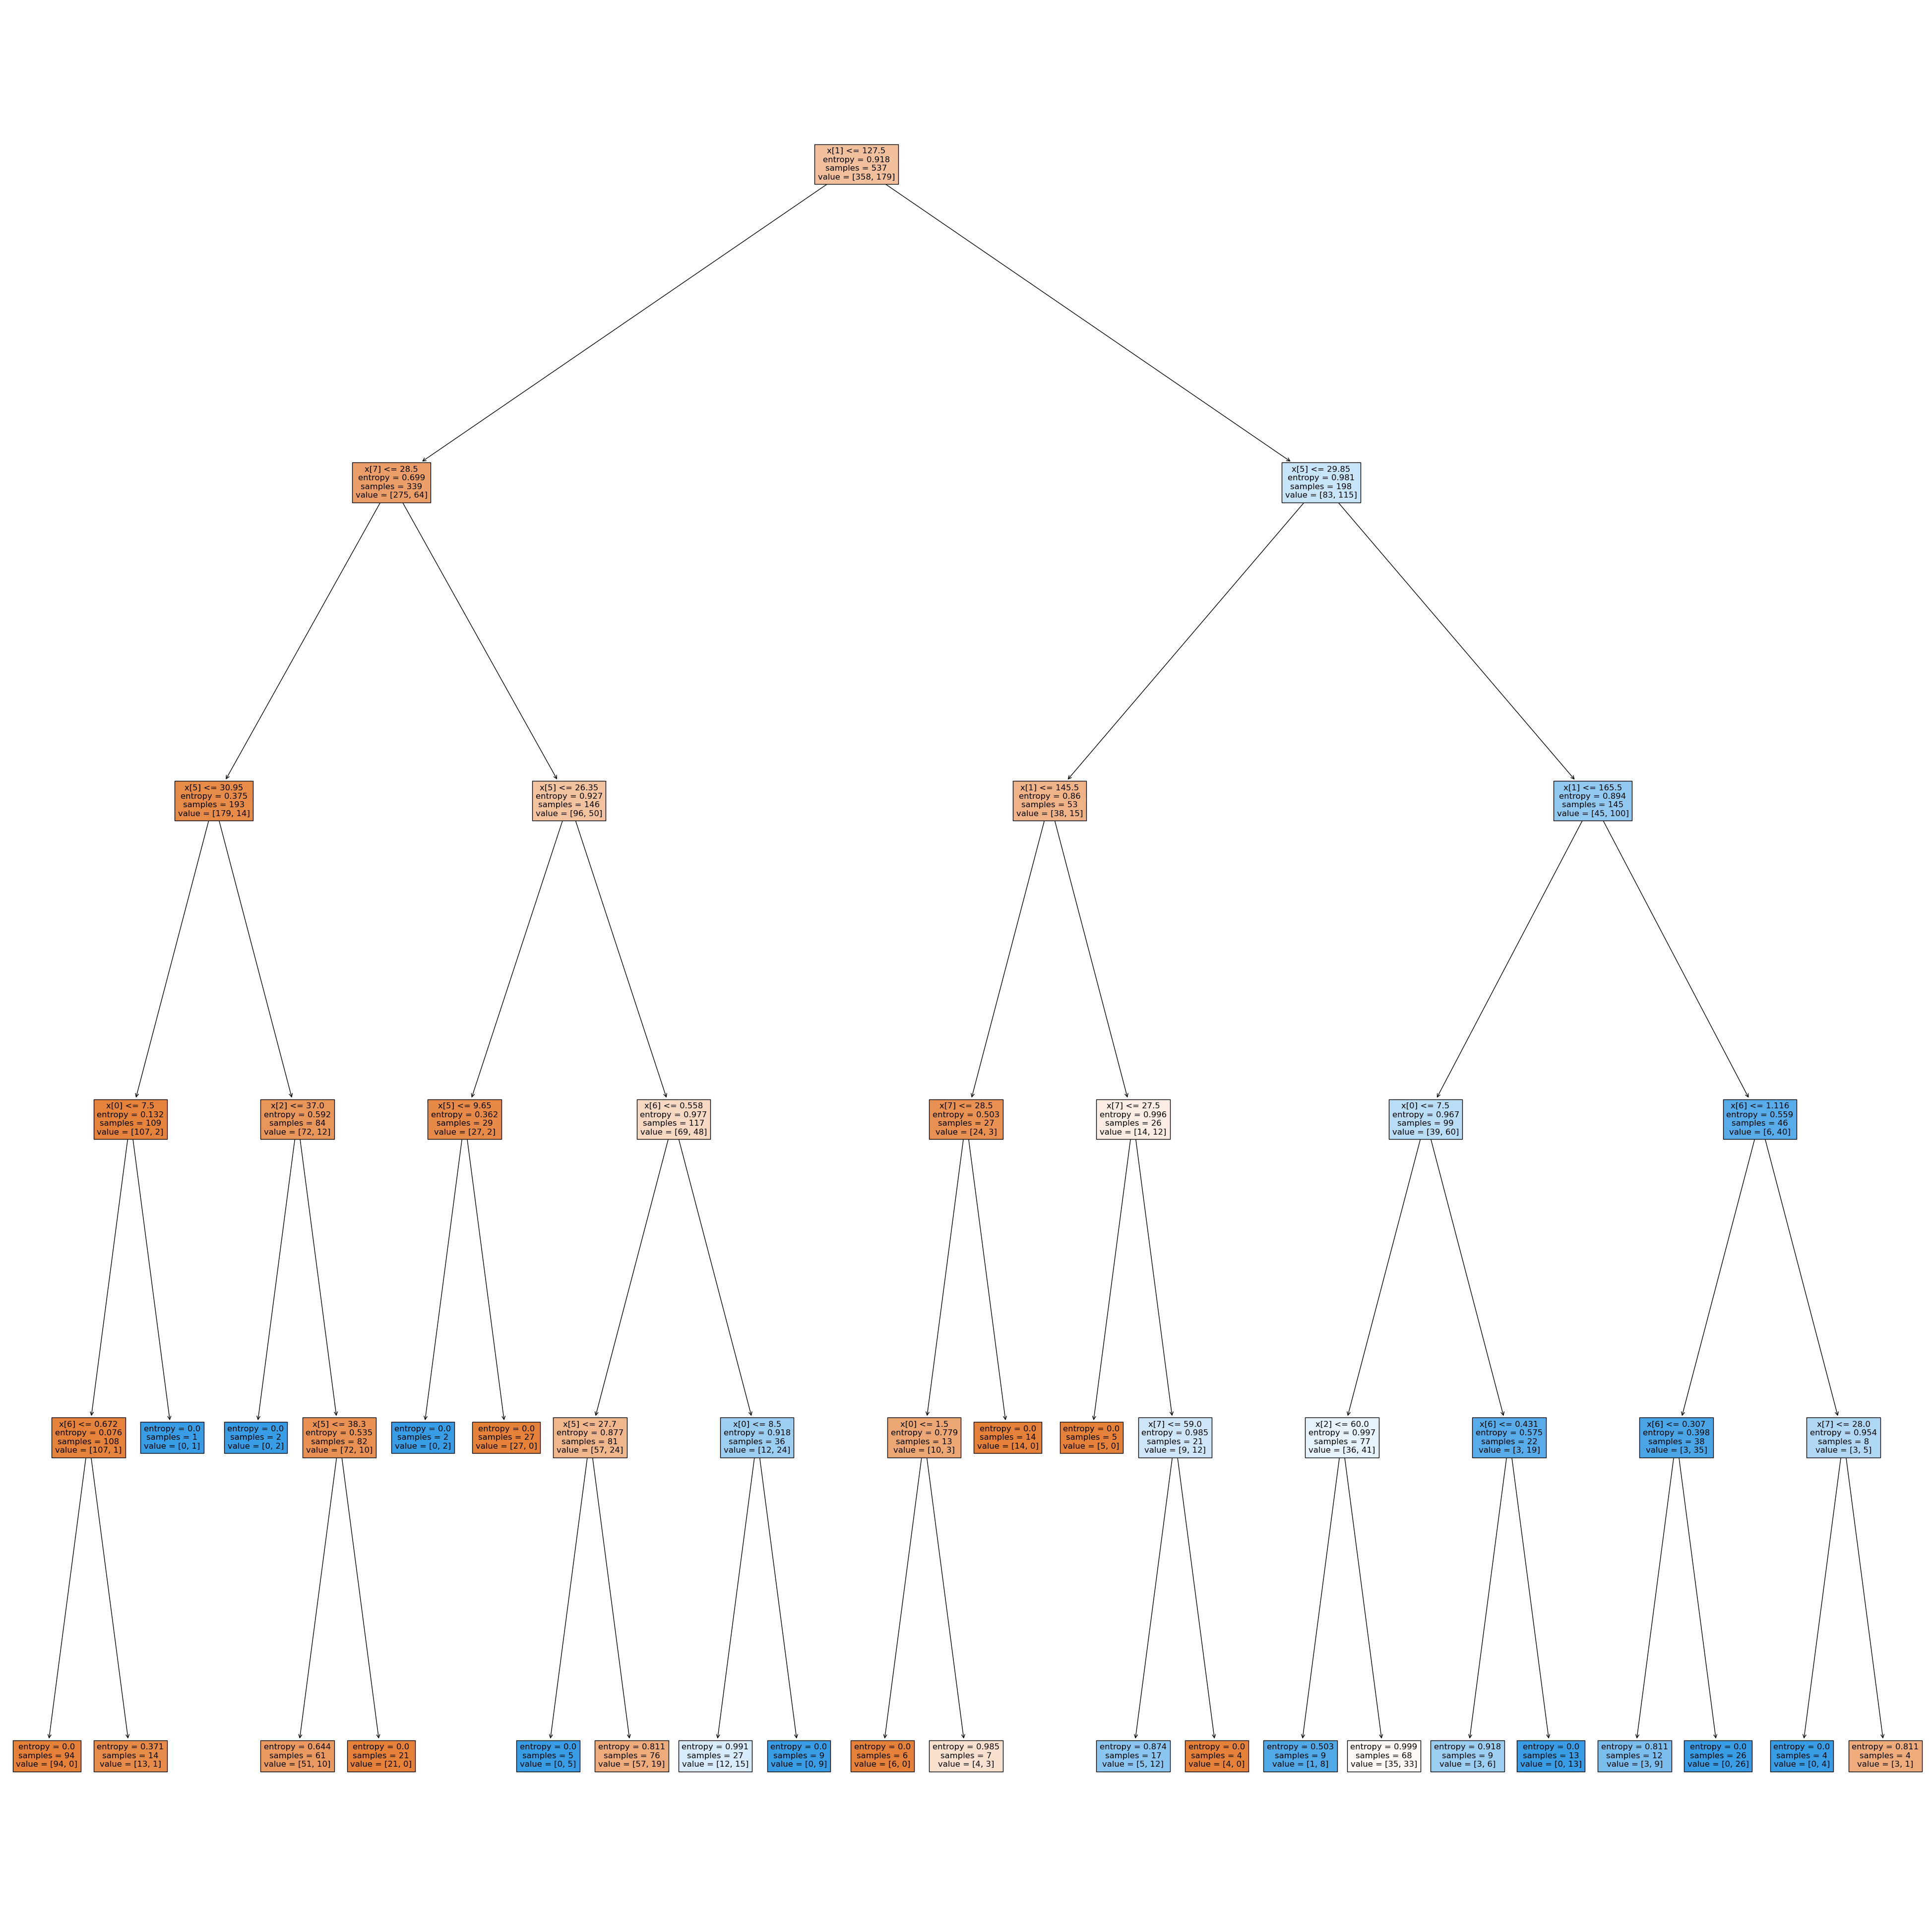

In [131]:
from sklearn import tree
plt.figure(figsize = (50,50))
tree.plot_tree(clf,filled=True)